In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
axs = [
    fig.add_subplot(121),
    fig.add_subplot(122, aspect=1),
]
theta = np.linspace(0, 4*np.pi, 128)

def update(f):
    for ax in axs:
        ax.cla() # ax をクリア
        ax.grid()
    axs[0].set_xlim([0, 4*np.pi])
    axs[0].plot(theta, np.cos(theta - f), c="blue")
    axs[0].plot(0, np.cos(f), "o", c="blue")

    axs[1].plot(np.sin(theta), np.cos(theta), c="gray")
    axs[1].plot(np.sin(f), np.cos(f), "o", c="blue")
    axs[1].plot(0, np.cos(f), "o", c="blue")
    axs[1].plot([0, np.sin(f)], [np.cos(f), np.cos(f)], c="blue")

anim = FuncAnimation(fig, update, frames=np.pi*np.arange(0,2,0.1), interval=200)

anim.save("TmpImages/c04.mp4", writer="ffmpeg", fps=60)
plt.close()

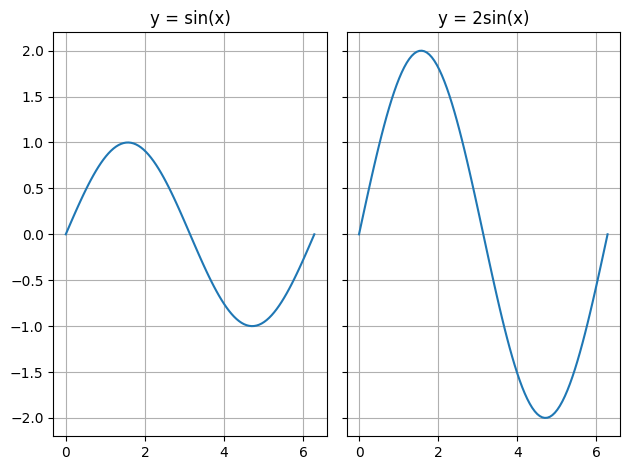

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# デモデータの生成
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = 2 * np.sin(x)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)  # sharey=True でy軸を共有

ax1.plot(x, y1)
ax1.set_title("y = sin(x)")
ax1.grid(True)

ax2.plot(x, y2)
ax2.set_title("y = 2sin(x)")
ax2.grid(True)

plt.tight_layout()
plt.show()


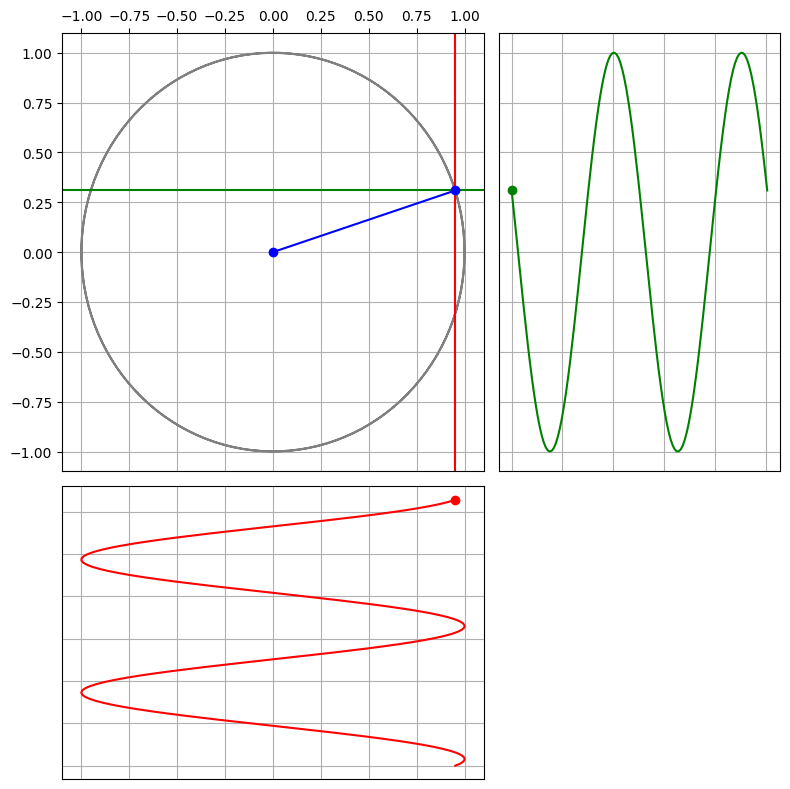

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import gridspec
from matplotlib import collections as mc

fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(2, 2, height_ratios=(6, 4), width_ratios=(6, 4))
axs = []
axs.append(plt.subplot(gs[0, 0]))
axs.append(plt.subplot(gs[0, 1], sharey=axs[0]))
axs.append(plt.subplot(gs[1, 0], sharex=axs[0]))

theta = np.linspace(0, 4*np.pi, 128)

axs[0].set_xlim([-1, 1])
axs[0].set_ylim([-1, 1])

#axs[1].set_ylim([-1, 1])
#axs[2].set_xlim([-1, 1])

def update(f, axs, theta):
    for ax in axs:
        ax.cla()
        ax.grid()
    # ベースの円
    axs[0].plot(np.cos(theta), np.sin(theta), c='gray')
    axs[0].axhline(y=np.sin(f), color='green')
    axs[0].axvline(x=np.cos(f), color='red')
    axs[0].plot(np.cos(f), np.sin(f), 'o', c='blue')
    axs[0].plot(0, 0, 'o', c='blue')
    line_seg = mc.LineCollection([[(0, 0), (np.cos(f), np.sin(f))]], color=['blue'])
    axs[0].add_collection(line_seg)
    axs[0].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

    axs[1].plot(theta, np.sin(f+theta), c='green')
    axs[1].plot(0, np.sin(f), 'o', c='green')
    axs[1].tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
    axs[2].plot(np.cos(theta-f), theta, c='red')
    axs[2].plot(np.cos(-f), theta[-1], 'o', c='red')
    axs[2].tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
    plt.tight_layout()

update(0.1 * np.pi, axs, theta)

#plt.show()

#anim = FuncAnimation(fig, update, frames=np.pi*np.arange(0, 6, 0.05), 
#                     fargs=(axs, theta), interval=200, repeat=True)
#anim.save("TmpImages/c05.mp4", writer="ffmpeg")
#plt.close()